EDA

Import Data

In [1]:
import pandas as pd
import numpy as np
#import matplotlib as plt
from matplotlib import pyplot as plt

import seaborn as sns 
import sklearn  as sk
from IPython.display import display
pd.options.display.max_columns = 100
import os  
import statistics

In [2]:
#columns =pd.read_excel("../Data/Book1.xlsx")
auto=pd.read_excel("../Data/Book1.xlsx")
names = pd.read_excel('../DATA/columns.xlsx',)

In [3]:
auto

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
200,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
201,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
202,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


<h5> Replace '?' in the data to None <h5>

In [77]:
names

,field_names
0,symboling
1,normalized-losses
2,make
3,fuel-type
4,aspiration
5,num-of-doors
6,body-style
7,drive-wheels
8,engine-location
9,wheel-base


In [4]:
auto=auto.replace({'?':None})
#auto = auto.replace({'?':None})

<h4> to add column names from the excel sheet <h4>

In [5]:
auto = pd.DataFrame(np.array(auto), columns = names['field_names'])

In [7]:
#auto = pd.DataFrame(np.array(auto), columns = names['columnnames'])
#auto.head()
#to add columnamse from the excel sheet


In [6]:
auto.head()

field_names,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
1,,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8,115,5500,18,22,17450
4,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250


In [85]:
auto['symboling'].unique()

array([3, '  ', 2, 1, 0, -1, -2], dtype=object)

In [7]:
def objToFloat(colList, df):
    copyDf = df.copy()
    
    for i in colList:
        copyDf[i] = pd.to_numeric(copyDf[i])
        
    return copyDf

wrongCast = ['normalized-losses', 'horsepower', 'peak-rpm', 'stroke', 'bore', 'price']

auto = objToFloat(wrongCast, auto)

In [7]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    164 non-null float64
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         203 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 201 non-null float64
stroke               201 non-null float64
compression-ratio    205 non-null float64
horsepower           203 non-

In [8]:
auto.describe(include = 'all')
#for continous values top will not be there.
#for categorical valus mean, percentile will not be there.
#before removing the ? we use dto get none when we display auto and we replace '?' with none we wil get NaN

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164.000000,205,205,205,203,205,205,205,205.000000,205.000000,205.000000,205.000000,205.000000,205,205,205.000000,205,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
unique,NaN,NaN,22,2,2,2,5,3,2,NaN,NaN,NaN,NaN,NaN,7,7,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota,gas,std,four,sedan,fwd,front,NaN,NaN,NaN,NaN,NaN,ohc,four,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,185,168,114,96,120,202,NaN,NaN,NaN,NaN,NaN,148,159,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.834146,122.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,174.049268,65.907805,53.724878,2555.565854,NaN,NaN,126.907317,NaN,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,12.337289,2.145204,2.443522,520.680204,NaN,NaN,41.642693,NaN,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,141.100000,60.300000,47.800000,1488.000000,NaN,NaN,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,166.300000,64.100000,52.000000,2145.000000,NaN,NaN,97.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,173.200000,65.500000,54.100000,2414.000000,NaN,NaN,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,183.100000,66.900000,55.500000,2935.000000,NaN,NaN,141.000000,NaN,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000


DATA wRANGLING
Number of rows = 205
Number od coloumns =26

In [9]:
auto.shape#to get the number of rows and columns of a Dataframe

(205, 26)

In [10]:
auto['make'].unique()#to get the values of a partiular column

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [11]:
len(auto['make'].unique())#to get the unique count

22

In [12]:
auto

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


In [72]:
pd.DataFrame(np.array(auto))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
1,,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8,115,5500,18,22,17450
4,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
200,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
201,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
202,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.4,23,106,4800,26,27,22470


In [73]:
auto.isnull().sum()

field_names
symboling             0
normalized-losses    40
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

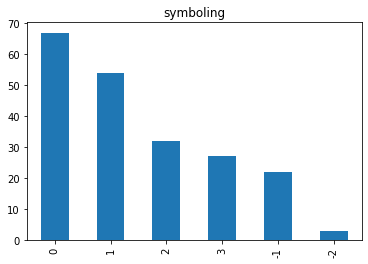

In [15]:
auto.symboling.value_counts().plot.bar(title = "symboling")

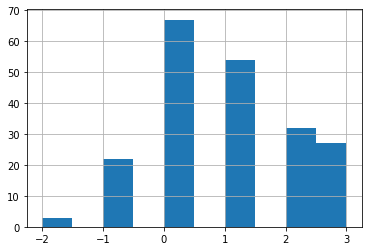

In [16]:
auto['symboling'].hist()
 

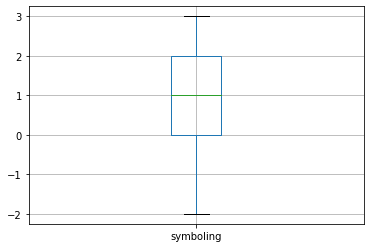

In [17]:
 auto.boxplot(column='symboling')

-2 are outliers here they do  not fall near any other data points

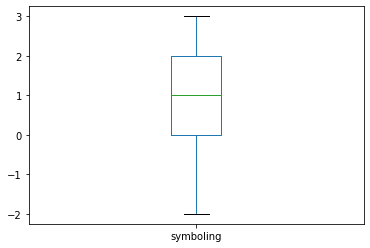

In [18]:
auto['symboling'].plot.box()

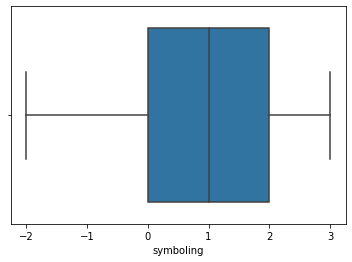

In [19]:
sns.boxplot(x=auto['symboling'])

In [20]:
auto1

NameError: name 'auto1' is not defined

In [ ]:
auto['normalized-losses']=auto['normalized-losses'].astype(float)
auto['normalized-losses'].plot.hist(bins=20)

In [ ]:
auto['normalized-losses']=auto['normalized-losses'].astype(float)
auto['normalized-losses'].plot.box()

In [ ]:
#auto.boxplot(column ='normalized-losses')#
#fig= plt.figure()
#ax = fig.add_subplot(1,1,1)
#ax.hist(auto['normalized-losses'])
#plt.xlabel("sfa")
# auto.boxplot(column='symboling')

In [ ]:
(auto['make'].value_counts()/len(auto['make']))

In [ ]:
(auto['make'].value_counts()/len(auto['make'])).plot.bar(title = 'make-manufacturer', figsize = (15,5))
auto['make'].value_counts()

In [ ]:
t =auto[(auto['make'] == 'toyota')]

In [ ]:
t.shape

In [9]:
#auto['fuel-type'].plot.bar(title= 'fuel-type of cars')

In [ ]:
auto['fuel-type'].value_counts().plot.bar(title= 'fuel-type of cars')

In [ ]:
auto['aspiration'].value_counts().plot.bar(title= 'aspiration of cars - turbo or standard')

In [ ]:
auto['num-of-doors'].value_counts().plot.bar(title ='number of Doors')

In [ ]:
auto.shape

In [ ]:
auto['body-style'].value_counts().plot.bar(title ='body-styles')

In [ ]:
auto['drive-wheels'].value_counts().plot.pie(title ='drive-wheels',figsize= (5,5),autopct='%.1f%%')

In [ ]:
auto['engine-location'].value_counts().plot.pie(title ='engine-location', figsize= (6,5),autopct='%.1f%%')

In [ ]:
auto['wheel-base'].plot.hist(bins = 30, title ='body-styles')

In [ ]:
auto['wheel-base'].plot.box()

In [ ]:
auto['length'].plot.hist(bins =20)

In [ ]:
auto['length'].plot.box()

In [ ]:
auto['engine-type'].value_counts().plot.bar(title = 'engine-type')

In [ ]:
auto['num-of-cylinders'].value_counts().plot.bar(title = 'number of cylinders')

In [ ]:
auto['engine-size'].plot.hist(bins =20)

In [ ]:
auto['engine-size'].plot.box()

In [ ]:
auto['fuel-system'].value_counts().plot.bar(title = 'fuel-system')

In [ ]:
auto['bore']=auto['bore'].astype(float)
auto['bore'].plot.hist(bins=20)

In [ ]:
auto['bore'].plot.box()

In [ ]:
auto['stroke']= auto['stroke'].astype(float)
auto['stroke'].plot.hist(title = 'stroke of the cars',figsize = (10,5),bins=10)

In [ ]:
auto['stroke'].plot.box()

In [ ]:
auto['compression-ratio'].plot.box()

In [ ]:
auto['compression-ratio'].plot.hist(bins=10)

In [ ]:
#auto['horsepower'].value_counts().plot.bar(figsize = (15,5))
#auto['stroke']= auto['stroke'].astype(float)
#auto['stroke'].value_counts().plot.hist(title = 'stroke of the cars',figsize = (10,5),bins= 25)
auto['horsepower'].value_counts().plot.hist(title= 'horsepower' ,bins=20)

In [ ]:
auto['peak-rpm'] =auto['peak-rpm'].astype(float)
auto['peak-rpm'].value_counts().plot.hist(title= '' ,bins=20)

In [ ]:
auto['city-mpg'].plot.hist(bins=30)

In [ ]:
auto['city-mpg'].plot.box()

In [ ]:
auto['highway-mpg'].plot.hist(bins=30)

In [ ]:
auto['highway-mpg'].plot.box()

In [ ]:
auto['price'].hist(bins=30,)

In [ ]:
auto['price']= auto['price'].astype(float)
auto['price'].plot.hist(bins=30)



In [ ]:
auto.hist(figsize = (15,10), color = 'blue')

In [ ]:

x = auto['make']
y = auto['price']
plt.figure(figsize=(20,5))
plt.scatter(x, y,
            alpha=1, edgecolors='none', s=50)

plt.title('Relation_btw_ price and maker')
plt.legend(loc=1) 

plt.xlabel("make")
plt.ylabel("price")
plt.show()

In [ ]:
x=auto['fuel-type']
y=auto['price']
plt.figure(figsize=(10,5))
plt.scatter(x,y, alpha =0.5)
plt.legend(loc=1)
plt.show()


In [ ]:
x=auto['aspiration']
y=auto['price']
plt.figure(figsize=(10,5))
plt.scatter(x,y, alpha =0.5)
plt.legend(loc=1)
plt.show()


In [ ]:
auto[auto['fuel-type']== 'gas']

In [ ]:
x=auto['drive-wheels']
y=auto['price']
plt.figure(figsize=(10,5))
plt.scatter(x,y)
plt.legend(loc=1)
plt.show()



We can infer that  rwd vehicles are more costlier

In [ ]:
x=auto['horsepower']
y=auto['price']
plt.figure(figsize=(10,5))
plt.scatter(x,y, alpha =0.5)
plt.legend(loc=1)
plt.show()


In [ ]:
x=auto['engine-type']
y=auto['price']
plt.figure(figsize=(10,5))
plt.scatter(x,y, alpha =0.5)
plt.legend(loc=1)
plt.show()


ohcv cars are very expensive


In [ ]:
x=auto['highway-mpg']
y=auto['price']
plt.figure(figsize=(10,5))
plt.scatter(x,y, alpha =0.5)
plt.legend(loc=1)
plt.show()


In [ ]:
x=auto['city-mpg']
y=auto['price']
plt.figure(figsize=(10,5))
plt.scatter(x,y, alpha =0.5)
plt.legend(loc=1)
plt.show()


CORRELATION PLOT

In [ ]:
corr = auto.corr()
corr

In [ ]:
corr = auto.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 200, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=30,
    horizontalalignment='right'
);

In [ ]:
    #(corr.style.background_gradient(cmap='corr')
#          .to_excel("mev_corr_matrix.xlsx", engine="openpyxl"))
#(corr.style.background_gradient(cmap='auto')
 #          .set_precision(2)
  #         .to_excel("mev_corr_matrix.xlsx"))

corr.to_excel("../output/correlation.xlsx")

In [ ]:
corrmat = auto.corr()
#f, ax = plt.subplots(figsize=(12, 9))
#Sns.heatmap(corrmat, vmax=.8, square=True);


In [ ]:
corrmat

In [ ]:

fax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);


DATA WRANGLING

<h3> Data wrangling <h3>
<h5> We have removed the following variables <h5>

In [ ]:
auto.isnull().sum()

In [ ]:
eliminatedVars = ['length', 'curb-weight', 'horsepower', 'city-mpg']
auto= auto.drop(eliminatedVars, axis =1)

In [ ]:
    #eliminatedVars = ['length', 'curb-weight', 'horsepower', 'city-mpg']
#auto= auto.drop(eliminatedVars, axis =1)

In [ ]:
auto

In [ ]:
# checking the missing values
(auto.isnull().sum()*100/len(auto))[auto.isnull().sum()*100/auto.shape[0] != 0]

In [ ]:
auto[auto['num-of-doors'].isna()]

->replace num-of - doors with mode as most of the cars are of 4 door type
->replace the missing values of bore with mean (no outliers here)
->replacde the missing values of stroke with mean (no outliers here) we have but ignored
->replace peak-rpm is replace with

In [ ]:
auto['num-of-doors'].isna().sum()

In [ ]:
auto['num-of-doors']= auto['num-of-doors'].fillna(statistics.mode(auto['num-of-doors']))

In [ ]:
auto['num-of-doors'].isna().sum()

In [ ]:
auto[auto['bore'].isna()]

<h4>bore<h4>

In [ ]:
auto[auto['bore'].isna()]

Here bore and stroke are the attributes of an engine, if we see the engine-type of rotor are not having the bore and stroke values that too from mazda make. This type model engine is not been manufacturing we will replace it with mean.


In [ ]:
auto['fuel-type'].value_counts()

In [ ]:
#CHECKING MISSING  FOR 'peak-rpm'
auto[auto['peak-rpm'].isna()]

for renault cars peak-rpm is missing,we will check on for all renault cars

In [ ]:
auto[(auto['make']=='renault')]

In [ ]:
    #auto['make'].value_counts()
#auto['bore']=auto['bore'].fillna(np.mean(auto['bore']))
#auto['bore'] = auto['bore'].fillna(np.mean(auto['bore']))                               

In [ ]:
auto[auto['peak-rpm'].isna()]

In [ ]:
auto.isnull().sum()

In [ ]:
auto.to_excel("../output/info.xlsx")

In [ ]:
auto['stroke'].isna().sum() #to see how many misisng values does stroke have

In [ ]:
auto[auto['stroke'].isna()]

In [ ]:
auto[auto['peak-rpm'].isna()]

In [ ]:
auto[auto['make']=='renault']

    renault cars are having peak-rpm missing values.

In [ ]:
auto[auto['price'].isna()]

In [ ]:
auto[(auto['make']=='audi')]

In [ ]:
auto[(auto['make']=='isuzu')]

In [ ]:
auto[(auto['make']== 'porsche')]

In [ ]:
auto['bore'] = auto['bore'].fillna(np.mean(auto['bore']))

In [ ]:
auto['stroke']= auto['stroke'].fillna(np.mean(auto['stroke']))
#auto['stroke'] = auto['stroke'].fillna(np.mean(auto['stroke']))

In [ ]:
auto['price'] = auto['price'].fillna(np.mean(auto['price']))

In [ ]:
auto['peak-rpm'] = auto['peak-rpm'].fillna(np.mean(auto['peak-rpm']))

In [ ]:
auto=auto.drop('normalized-losses',axis = 1)

In [ ]:
auto.isna().sum()

In [ ]:
dummy1 = pd.get_dummies(auto['make'])
auto =  pd.concat([dummy1, auto], axis =1 )

In [ ]:
dummy2 = pd.get_dummies(auto['body-style'])
auto =  pd.concat([dummy2, auto], axis =1 )

In [ ]:
dummy3 = pd.get_dummies(auto['drive-wheels'])
auto =  pd.concat([dummy3, auto], axis =1 )

In [ ]:
dummy4 = pd.get_dummies(auto['engine-type'])
auto =  pd.concat([dummy4, auto], axis =1 )

In [ ]:
dummy5= pd.get_dummies(auto['num-of-cylinders'])
auto =  pd.concat([dummy5, auto], axis =1 )

In [ ]:
dummy6 = pd.get_dummies(auto['fuel-system'])
auto =  pd.concat([dummy6, auto], axis =1 )

In [ ]:
auto['fuel-type']= auto['fuel-type'].replace(['gas'],0)
auto['fuel-type']= auto['fuel-type'].replace(['diesel'],1)

In [ ]:
auto['num-of-doors']= auto['num-of-doors'].replace(['two'],0)
auto['num-of-doors']= auto['num-of-doors'].replace(['four'],1)

In [ ]:
#auto.aspiration.value_counts()
auto['aspiration']= auto['aspiration'].replace(['std'],0)
auto['aspiration']= auto['aspiration'].replace(['turbo'],1)

In [ ]:

auto['engine-location']= auto['engine-location'].replace(['front'],0)
auto['engine-location']= auto['engine-location'].replace(['rear'],1)

In [ ]:
auto

In [ ]:
 auto = auto.drop(['make','body-style','drive-wheels','engine-type','num-of-cylinders','fuel-system'], axis = 1)

In [ ]:
#auto=  auto.drop(['make','body-style','drive-wheels','engine-type','num-of-cylinders','fuel-system'],axis = 1)
auto

In [ ]:
import numpy as np
>>> from sklearn.model_selection import train_test_split
>>> X, y = np.arange(10).reshape((5, 2)), range(5)

To split the data into two parts i.e independrn variables(X), dependent variables(Y).

In [ ]:
x=auto.iloc[:,:-1]

In [ ]:
x

In [ ]:
y=auto.iloc[:,-1]

In [ ]:
y

In [ ]:
tv_train.shape

In [ ]:
tv_test.shape

In [ ]:
from sklearn.preprocessing import Imputer

In [ ]:
from sklearn.model_selection import train_test_split
sv_train, sv_test, tv_train, tv_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [ ]:
sv_train

In [ ]:
tv_train.shape

In [ ]:
sv_train.isna().sum()

In [ ]:
sv_test


In [ ]:

from sklearn.linear_model import LinearRegression

In [ ]:
lreg = LinearRegression()



In [ ]:
lreg.fit(sv_train,tv_train)

In [ ]:
x.columns

In [ ]:
coeff = list(lreg.coef_)
columns = list(x.columns)

In [ ]:

pd.DataFrame({'col': columns, 'coeff': coeff}).to_csv('../OUTPUT/coeff.csv')
pd.DataFrame({ 'price act': y, 'price pred': lreg.predict(x)}).to_csv('../OUTPUT/pred.csv')

In [ ]:
import statsmodels.regression.linear_model as sm
from sklearn import datasets, linear_model,metrics
#import statsmodels.formula.api as sm
regressor_OLS = sm.OLS(endog = tv_train, exog = sv_train).fit() 
regressor_OLS.summary()

In [ ]:
pd.DataFrame({ 'price act': tv_train, 'price pred': regressor_OLS.predict(sv_train)}).to_csv('../OUTPUT/pred4.csv')